In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

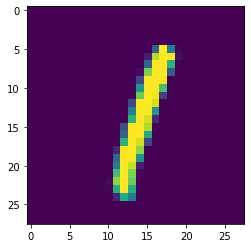

In [ ]:
plt.imshow(Xtest[5])

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
Xtrain=Xtrain.reshape(60000,28,28,1)
Xtest=Xtest.reshape(10000,28,28,1)
Ytrain=to_categorical(Ytrain)
Ytest=to_categorical(Ytest)

Neural Net


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

Compile


In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(Xtrain,Ytrain, validation_data=(Xtest,Ytest), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 136s 69ms/step - loss: 2.8476 - accuracy: 0.8946 - val_loss: 0.1144 - val_accuracy: 0.9667
Epoch 2/3
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.1054 - val_accuracy: 0.9715
Epoch 3/3
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.1511 - val_accuracy: 0.9647


In [ ]:
_, acc = model.evaluate(Xtest, Ytest, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 4s 13ms/step - loss: 0.1511 - accuracy: 0.9647
> 96.470


In [ ]:
layer=1
accuracies=[]
while (layer <= 4):
  print("number of layers: ",layer)
  model = Sequential()

  for i in range(0,layer):
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
  
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
  model.fit(Xtrain,Ytrain, validation_data=(Xtest,Ytest), epochs=3)
  _, acc = model.evaluate(Xtest, Ytest, verbose=0)
  accuracies.append(acc)
  model=0
  layer+=1

number of layers:  1
Epoch 1/3
1875/1875 [==============================] - 87s 46ms/step - loss: 2.7956 - accuracy: 0.8981 - val_loss: 0.1235 - val_accuracy: 0.9659
Epoch 2/3
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.1169 - val_accuracy: 0.9701
Epoch 3/3
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.1357 - val_accuracy: 0.9658
number of layers:  2
Epoch 1/3
1875/1875 [==============================] - 299s 159ms/step - loss: 0.8811 - accuracy: 0.9197 - val_loss: 0.0873 - val_accuracy: 0.9735
Epoch 2/3
1875/1875 [==============================] - 300s 160ms/step - loss: 0.0650 - accuracy: 0.9802 - val_loss: 0.0761 - val_accuracy: 0.9771
Epoch 3/3
1875/1875 [==============================] - 298s 159ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0762 - val_accuracy: 0.9784
number of layers:  3
Epoch 1/3
1875/1875 [==============================] - 505s 2

In [ ]:
import numpy as np

In [ ]:
ac100 = np.array(accuracies) * 100.0

In [ ]:
accuracies

[0.9657999873161316, 0.9783999919891357, 0.980400025844574, 0.9825000166893005]

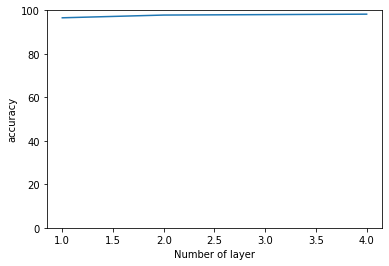

In [ ]:
plt.plot([1,2,3,4],ac100)
plt.xlabel("Number of layer")
plt.ylabel("accuracy")
plt.ylim(0,100)
plt.show()